In [365]:
from tqdm.auto import tqdm
import torchvision.models.resnet as resnet
import torch
import os
import glob
import argparse
from dotenv import load_dotenv, find_dotenv
from torch.utils.data import DataLoader
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from lazypredict.Supervised import LazyClassifier
import sklearn
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold


In [3]:
val_preds  = pickle.load(open('../../val_preds.pkl', 'rb'))

val_img_preds = []
val_img_truth = []

for i in val_preds.keys():
   val_img_preds.append(torch.argmax(torch.from_numpy(val_preds[i][0]), dim=1))
   val_img_truth.append(torch.from_numpy(val_preds[i][2]))

all_truths = torch.cat(val_img_truth).numpy()
all_preds = torch.cat(val_img_preds).numpy()

#accuracy
print('Accuracy: ', sklearn.metrics.accuracy_score(all_truths, all_preds))

Accuracy:  0.005077046405985571


In [4]:
path = '../../data/annotations/imagenet_x_train_multi_factor.jsonl'

In [5]:
df = pd.read_json(path, lines=True)

In [6]:
dotenvpath = find_dotenv()
load_dotenv(dotenvpath)

annotation_path = '../../data/annotations/'
path = '/mnt/f/MetalabelIntegration/'

train_data = UseMetaData(
        "train", path, annotation_path, transform=ValTransforms()
    )
val_data = UseMetaData("val", path, annotation_path, transform=ValTransforms())
    
number_of_classes = len(train_data.classes)

train_loader = DataLoader(
        train_data,
        batch_size=8,
        num_workers=8,
    )

val_loader = DataLoader(
        val_data,
        batch_size=8,
        num_workers=4,
    )

NameError: name 'UseMetaData' is not defined

In [ ]:
val_loader.dataset[3]

(tensor([[[-1.3473, -1.3987, -1.3987,  ..., -1.2103, -1.2274, -1.2274],
          [-1.2959, -1.3130, -1.3130,  ..., -1.2103, -1.1760, -1.1589],
          [-1.2788, -1.2788, -1.2445,  ..., -1.2103, -1.1760, -1.1418],
          ...,
          [-2.0665, -2.1008, -2.0837,  ..., -1.8953, -1.9124, -1.8953],
          [-2.0837, -2.0837, -2.1008,  ..., -1.8610, -1.8610, -1.8439],
          [-2.1008, -2.1008, -2.1008,  ..., -1.8610, -1.8439, -1.8610]],
 
         [[ 1.0805,  1.0805,  1.0980,  ..., -0.6001, -0.6001, -0.6001],
          [ 1.1155,  1.1506,  1.1506,  ..., -0.6176, -0.6001, -0.5826],
          [ 1.1331,  1.1506,  1.1155,  ..., -0.6176, -0.6001, -0.5476],
          ...,
          [-2.0357, -2.0357, -2.0182,  ..., -1.9132, -1.8782, -1.9307],
          [-2.0357, -2.0182, -2.0357,  ..., -1.9657, -1.9307, -1.9482],
          [-2.0357, -2.0182, -2.0357,  ..., -2.0182, -2.0182, -2.0182]],
 
         [[ 1.4025,  1.3677,  1.3677,  ...,  0.1302,  0.1302,  0.1476],
          [ 1.4025,  1.4200,

In [ ]:
print(len(val_loader.dataset.class_to_idx))
print(len(train_loader.dataset.class_to_idx))

999
999


In [ ]:
len()

In [ ]:
val_loader.dataset[6000]

(tensor([[[ 2.0777,  2.0777,  2.0948,  ...,  2.1462,  2.1804,  2.1633],
          [ 2.1119,  2.0948,  2.0948,  ...,  2.1290,  2.1633,  2.1462],
          [ 2.1290,  2.0948,  2.1119,  ...,  2.1462,  2.1290,  2.1804],
          ...,
          [-0.3369, -0.2684, -0.1828,  ...,  0.9646,  0.9817,  1.0159],
          [-0.5938, -0.4397, -0.2513,  ...,  0.9646,  0.9817,  0.9132],
          [-1.8439, -1.5357, -1.1932,  ...,  1.4269,  1.5297,  1.0331]],
 
         [[ 2.3936,  2.3936,  2.4111,  ...,  2.0434,  2.0959,  2.0959],
          [ 2.3936,  2.3936,  2.3936,  ...,  2.0434,  2.0784,  2.0784],
          [ 2.3936,  2.3936,  2.3761,  ...,  1.9909,  2.0259,  2.0084],
          ...,
          [-0.0224, -0.0224,  0.0301,  ...,  0.8004,  0.8004,  0.8179],
          [-0.2150, -0.0224,  0.0826,  ...,  0.8529,  0.7829,  0.8179],
          [-1.6331, -1.3004, -0.8978,  ...,  1.2206,  1.1155,  0.8529]],
 
         [[ 2.2740,  2.1868,  2.2566,  ...,  1.7860,  1.8383,  1.8557],
          [ 2.2914,  2.3263,

In [ ]:
np.shape(val_dict[0][1])

(8, 16)

# Training and testing

**Kan ikke huske er embeddings lavet med et forward pass på de 50.000 billeder?**
**Måske stadig spørge Nicki om hans approach med at lave embeddings på 50.000 images, for derefter 

In [366]:
val_dict = pickle.load(open('../../data/train_embeddings.pkl', 'rb')) # De 50.000 billeder
#val_dict = pickle.load(open('../../data/val_embeddings.pkl', 'rb'))

In [368]:
# train_img_data = []
# train_meta_data = []
# train_labels = []

val_img_data = []
val_meta_data = []
val_labels = []

# for i in train_dict.keys():
#     train_img_data.append(torch.from_numpy(train_dict[i][0]))
#     train_meta_data.append(torch.from_numpy(train_dict[i][1]))
#     train_labels.append(torch.from_numpy(train_dict[i][2]))

for i in val_dict.keys():
    val_img_data.append(torch.from_numpy(val_dict[i][0]))
    val_meta_data.append(torch.from_numpy(val_dict[i][1]))
    val_labels.append(torch.from_numpy(val_dict[i][2]))

In [369]:
# train_img_data = torch.cat(train_img_data, 0).detach()
# train_meta_data = torch.cat(train_meta_data, 0)
# train_cat_data = torch.cat([train_img_data, train_meta_data], 1).numpy()
# train_labels = torch.cat(train_labels, 0).numpy()

In [370]:
val_img_data = torch.cat(val_img_data, 0).detach()
val_meta_data = torch.cat(val_meta_data, 0)
val_cat_data = torch.cat([val_img_data, val_meta_data], 1).numpy()
val_labels = torch.cat(val_labels, 0).numpy()

In [371]:
# all_cat_data = np.concatenate([train_cat_data, val_cat_data], 0)
# all_labels = np.concatenate([train_labels, val_labels], 0)
# all_img_data = np.concatenate([train_img_data, val_img_data], 0)

#### using k=?-split

In [24]:
def test_classifier(classifier):

    clf_cat = classifier()
    clf_img = classifier()

    clf_cat.fit(X_train_cat, y_train_cat)

    y_pred_cat = clf_cat.predict(X_test_cat)

    accuracy_cat = sklearn.metrics.accuracy_score(y_test_cat, y_pred_cat)

    print('Accuracy cat: ', sklearn.metrics.accuracy_score(y_test_cat, y_pred_cat))

    return clf_cat, clf_img, y_pred_cat, accuracy_cat

def test_classifier_fold(classifier, X_train_cat, y_train_cat, X_test_cat, y_test_cat, X_train_img, y_train_img, X_test_img, y_test_img):

    clf_cat = classifier()
    clf_img = classifier()

    clf_cat.fit(X_train_cat, y_train_cat)
    clf_img.fit(X_train_img, y_train_img)


    y_pred_cat = clf_cat.predict(X_test_cat)
    y_pred_img = clf_img.predict(X_test_img)

    accuracy_cat = sklearn.metrics.accuracy_score(y_test_cat, y_pred_cat)
    accuracy_img = sklearn.metrics.accuracy_score(y_test_img, y_pred_img)

    print('Accuracy cat: ', sklearn.metrics.accuracy_score(y_test_cat, y_pred_cat))
    print('Accuracy img: ', sklearn.metrics.accuracy_score(y_test_img, y_pred_img))

    return clf_cat, clf_img, y_pred_cat, y_pred_img, accuracy_cat, accuracy_img


In [11]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.evaluate import mcnemar_table
from mlxtend.evaluate import mcnemar



X = val_cat_data

N_splits = 5
kf = KFold(n_splits=N_splits)
kf.get_n_splits(X)

print(kf)

df_acc = pd.DataFrame(columns=['Using Meta', 'Just images', 'Delta', 'McNemar p-value'])
M_table_cumm = np.zeros((2,2))
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i + 1}:")
    _,_, y_pred_cat, y_pred_img, acc_cat, acc_img = test_classifier_fold(classifier=KNeighborsClassifier,
                                                      X_train_cat = val_cat_data[train_index],
                                                        y_train_cat = val_labels[train_index],
                                                          X_test_cat = val_cat_data[test_index],
                                                            y_test_cat = val_labels[test_index], 
                                                              X_train_img = val_img_data[train_index],
                                                                y_train_img = val_labels[train_index],
                                                                  X_test_img = val_img_data[test_index],
                                                                    y_test_img = val_labels[test_index])
    # Run a mcnemar test for the two classifiers
    M_table = mcnemar_table(y_target= val_labels[test_index],
                             y_model1 = y_pred_cat,
                              y_model2 = y_pred_img)
    print(M_table)
    M_table_cumm += M_table
    chi2, p = mcnemar(ary=M_table_cumm, corrected=True)
    # append accuracies to df_acc
    df_acc.loc[i] = [acc_cat, acc_img, acc_cat- acc_img, p]
print(M_table_cumm)
print(df_acc)
print('------------Cummulated McNemar test------------')
print(mcnemar(ary=M_table_cumm, corrected=True))
    

KFold(n_splits=5, random_state=None, shuffle=False)
Fold 1:
Accuracy cat:  0.6521383261714754
Accuracy img:  0.6513198281154082
[[6341   33]
 [  25 3375]]
Fold 2:
Accuracy cat:  0.6601186822181297
Accuracy img:  0.6582770615919787
[[6415   37]
 [  19 3303]]
Fold 3:
Accuracy cat:  0.6657458563535912
Accuracy img:  0.6651319828115408
[[6480   27]
 [  21 3246]]
Fold 4:
Accuracy cat:  0.6619257137010129
Accuracy img:  0.6617210682492581
[[6438   31]
 [  29 3275]]
Fold 5:
Accuracy cat:  0.665097718203213
Accuracy img:  0.6642791363961936
[[6473   27]
 [  19 3254]]
[[32147.   155.]
 [  113. 16453.]]
   Using Meta  Just images     Delta  McNemar p-value
0    0.652138     0.651320  0.000818         0.358020
1    0.660119     0.658277  0.001842         0.019208
2    0.665746     0.665132  0.000614         0.014868
3    0.661926     0.661721  0.000205         0.026773
4    0.665098     0.664279  0.000819         0.012263
------------Cummulated McNemar test------------
(6.272388059701493, 0.01226

In [390]:
X = val_cat_data

N_splits = 5
kf = KFold(n_splits=N_splits, shuffle=True, random_state=42)
kf.get_n_splits(X)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    if i == 4:
        print(test_index)

[    2     9    10 ... 48849 48853 48865]


#### Using k=1-split

In [22]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(val_cat_data, val_labels, test_size=0.2, random_state=42)
X_train_img, X_test_img, y_train_img, y_test_img = train_test_split(val_img_data, val_labels, test_size=0.2, random_state=42)

# https://stackoverflow.com/questions/49134338/kfolds-cross-validation-vs-train-test-split

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [27]:
clf_cat, clf_img, y_pred_cat, y_pred_img, accuracy_cat, accuracy_img = test_classifier(KNeighborsClassifier)

Accuracy cat:  0.6633926744423982


ValueError: not enough values to unpack (expected 6, got 4)

In [53]:
clf_cat, clf_img, y_pred_cat, y_pred_img, accuracy_cat, accuracy_img = test_classifier(LogisticRegression)

Accuracy cat:  0.7200736648250461
Accuracy img:  0.7160834868017188


In [56]:
clf_cat, clf_img, y_pred_cat, y_pred_img, accuracy_cat, accuracy_img = test_classifier(xgb.XGBClassifier)

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf_cat, clf_img, y_pred_cat, y_pred_img, accuracy_cat, accuracy_img = test_classifier(RandomForestClassifier)

Fitting classifier 1 - cat


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_cat, clf_img, y_pred_cat, y_pred_img, accuracy_cat, accuracy_img = test_classifier(DecisionTreeClassifier)

In [75]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_img_data, train_labels)
preds = classifier.predict(val_img_data)
print((preds == val_labels).mean())

0.006145898280929901


In [18]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(val_cat_data[:1000], val_labels[:1000])

SVC()

In [20]:
clf.predict(val_cat_data[1000:5000])

array([524, 804, 826, ..., 524, 175, 495])

In [43]:
preds = clf.predict(val_cat_data)
print((preds == val_labels).mean())

0.9998772202668413


In [44]:
clf = LogisticRegression()
clf.fit(val_img_data, val_labels)
preds = clf.predict(val_img_data)
print((preds == val_labels).mean())

0.9994474912007858


### RandomForestClassifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_img, y_train_img)
preds = classifier.predict(X_test_img)
print((preds == y_test_img).mean())

KeyboardInterrupt: 

### DecisionTreeClassifier

In [7]:
from sklearn.tree import DecisionTreeClassifier

for train_data in tqdm([train_img_data, train_cat_data]):
    classifier = DecisionTreeClassifier(random_state=0)
    classifier.fit(train_data.numpy(), train_labels.numpy())
    preds = classifier.predict(train_data.numpy())
    acc = (preds == train_labels.numpy()).mean()
    print(acc)

  0%|          | 0/2 [00:00<?, ?it/s]

### Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
for train_data in tqdm([train_img_data, train_cat_data]):
    classifier = GaussianNB()
    classifier.fit(train_data.numpy(), train_labels.numpy())
    preds = classifier.predict(train_data.numpy())
    acc = (preds == train_labels.numpy()).mean()
    print(acc)

  0%|          | 0/2 [08:12<?, ?it/s]


KeyboardInterrupt: 

# PCA 

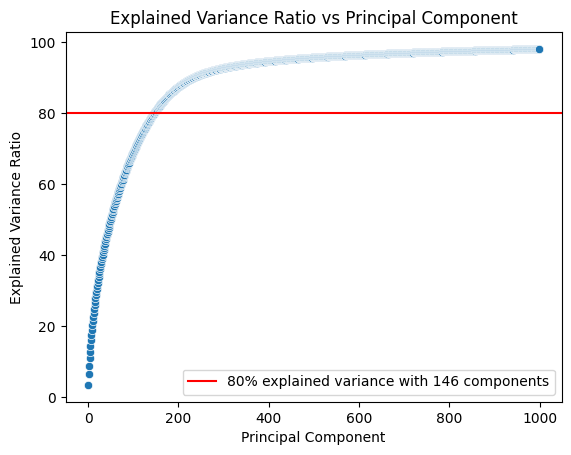

In [11]:
from sklearn.decomposition import PCA
X = val_cat_data   #train_cat_data
pca = PCA(n_components=1000)
pca.fit(X)

sns.scatterplot(np.cumsum(pca.explained_variance_ratio_*100))
nr = np.where(np.cumsum(pca.explained_variance_ratio_*100) > 80)[0][0]

plt.axhline(y=80, color='r', linestyle='-', label=f'80% explained variance with {nr} components')
plt.legend()
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Principal Component')
plt.show()



In [41]:
np.cumsum(pca.explained_variance_ratio_*100)[49]

49.790424

In [42]:
listo = []
for X in [val_img_data, val_cat_data]:
    pca = PCA(n_components=150)
    pca.fit(X)
    # do the PCA
    X_pca = pca.transform(X)
    listo.append(X_pca)

dict_150_pca = {}

dict_150_pca['img'] = listo[0]
dict_150_pca['cat'] = listo[1]
dict_150_pca['labels'] = val_labels

In [50]:
#X_pca.shape
# save the PCA data in pickle file
with open('../../data/embeddings_PCA.pickle', 'wb') as f:
    pickle.dump(dict_150_pca, f)


In [53]:
listo = []
for X in [val_img_data, val_cat_data]:
    pca = PCA(n_components=50)
    pca.fit(X)
    # do the PCA
    X_pca = pca.transform(X)
    listo.append(X_pca)

dict_50_pca = {}

dict_50_pca['img'] = listo[0]
dict_50_pca['cat'] = listo[1]
dict_50_pca['labels'] = val_labels

# save the PCA data in pickle file
with open('../../data/embeddings_PCA-ULTRA.pickle', 'wb') as f:
    pickle.dump(dict_50_pca, f)

# Getting metalabel tabular data


In [9]:
dotenvpath = find_dotenv()
load_dotenv(dotenvpath)

annotation_path = "../../data/annotations/"
path = '/mnt/f/MetalabelIntegration/'

In [10]:
train_data = UseMetaData(
        "train", path, annotation_path, transform=ValTransforms()
    )
val_data = UseMetaData("val", path, annotation_path, transform=ValTransforms())
    
number_of_classes = len(train_data.classes)

train_loader = DataLoader(
        train_data,
        batch_size=16,
        num_workers=8,
        pin_memory=True,
        shuffle=True,
    )

val_loader = DataLoader(
        val_data,
        batch_size=16,
        num_workers=8,
        pin_memory=True,
        shuffle=True,
    )

NameError: name 'UseMetaData' is not defined

In [10]:
model = torch.hub.load(
                "pytorch/vision:v0.9.0",
                "resnet50",
                weights="ResNet50_Weights.IMAGENET1K_V1",
            )
model.fc = torch.nn.Identity()
model.eval()

Using cache found in /home/juliu/.cache/torch/hub/pytorch_vision_v0.9.0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
train_img_data = []
train_meta_data = []
train_labels = []

for i, batch in enumerate(tqdm.tqdm(train_loader)):
    train_img_data.append(model(batch[0]))
    train_meta_data.append(batch[1])
    train_labels.append(batch[2])
    if i > 100:
        break

train_img_data = torch.cat(train_img_data, 0).detach()
train_meta_data = torch.cat(train_meta_data, 0)
train_cat_data = torch.cat([train_img_data, train_meta_data], 1)
train_labels = torch.cat(train_labels, 0)

In [98]:
df = pd.read_csv('../../k-fold/final_mcnemar/rfc_mcnemarTSNE.csv', index_col=0)
df.index = df.index + 1

df

,Using Meta,Just Images,Delta,Conf,McNemar p-value,Final acc_using_meta,Final acc_just_images,Final p_1,Final theta_2,Final CI_2,Final p_2
1,0.650399,0.648046,0.002353,"(-0.002249790392944595, 0.00695610504337818)",0.337900,0.653802,0.65153,0.034319,0.002271,"(0.00016791112966796362, 0.004374929084912882)",0.035954
2,0.650808,0.652957,-0.002149,"(-0.006734018784102513, 0.0024369485458093365)",0.381843,0.653802,0.65153,0.034319,0.002271,"(0.00016791112966796362, 0.004374929084912882)",0.035954
3,0.661653,0.661346,0.000307,"(-0.004339714745715373, 0.004953581751697467)",0.931233,0.653802,0.65153,0.034319,0.002271,"(0.00016791112966796362, 0.004374929084912882)",0.035954
4,0.653126,0.647396,0.005730,"(0.0008934178833508444, 0.010566595212150087)",0.022537,0.653802,0.65153,0.034319,0.002271,"(0.00016791112966796362, 0.004374929084912882)",0.035954
5,0.653024,0.647908,0.005116,"(0.00027921805772157526, 0.009952936479412422)",0.042151,0.653802,0.65153,0.034319,0.002271,"(0.00016791112966796362, 0.004374929084912882)",0.035954


In [100]:
(0.00016791112966796362 - 0.004374929084912882)/2

-0.002103508977622459

In [99]:
# format latex table nicely
print(df.iloc[:,:3].to_latex())


\begin{tabular}{lrrr}
\toprule
{} &  Using Meta &  Just Images &     Delta \\
\midrule
1 &    0.650399 &     0.648046 &  0.002353 \\
2 &    0.650808 &     0.652957 & -0.002149 \\
3 &    0.661653 &     0.661346 &  0.000307 \\
4 &    0.653126 &     0.647396 &  0.005730 \\
5 &    0.653024 &     0.647908 &  0.005116 \\
\bottomrule
\end{tabular}



/var/folders/0l/26n95fy50m782tbz32d5_1g40000gn/T/ipykernel_95368/1544154714.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.iloc[:,:3].to_latex())


In [ ]:
# format latex table nicely

In [12]:
a = df['Using Meta'].mean()

In [13]:
b = df['Just images'].mean()

In [14]:
b-a

-0.0016575150954286633

In [19]:
np.array([0.0009806031607664245, 0.002334448885514817]) -0.0016575150954286633


array([-0.00067691,  0.00067693])

In [20]:
b

0.6604729487460295

In [21]:
a

0.6621304638414581

In [47]:
pd.DataFrame(zip([1,2,3,4],[6,5,4,3]), columns=['a','b'])

,a,b
0,1,6
1,2,5
2,3,4
3,4,3


In [60]:
# With Learnable Parameters
from torch import nn
m = nn.AvgPool2d((1,1))
# Without Learnable Parameters
#m = nn.BatchNorm2d(100, affine=False)
input = torch.randn(1, 1, 2048, 3)
output = m(input)
output.size()

torch.Size([1, 1, 2048, 3])

In [61]:
torch.all(input == output)

tensor(True)

In [92]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=30.0).fit_transform(val_cat_data)
X_embedded_img = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=30.0).fit_transform(val_img_data)


In [94]:
dict_tsne = {'img': X_embedded_img, 'cat': X_embedded, 'labels': val_labels}
# save to pickle
with open('../../data/embeddings_TSNE.pickle', 'wb') as f:
    pickle.dump(dict_tsne, f)
    

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [8]:


classifier = KNeighborsClassifier
N_splits = 5
kf = KFold(n_splits=N_splits, shuffle=True, random_state=42)
kf.get_n_splits(X_embedded)

for i, (train_index, test_index) in enumerate(kf.split(X_embedded)):
        print(f"Fold {i + 1}:")
        _,_, y_pred_cat, y_pred_img, acc_cat, acc_img = test_classifier_fold(classifier=classifier,
                                                        X_train_cat = X_embedded[train_index],
                                                            y_train_cat = val_labels[train_index],
                                                            X_test_cat = X_embedded[test_index],
                                                                y_test_cat = val_labels[test_index], 
                                                                X_train_img = X_embedded_img[train_index],
                                                                    y_train_img = val_labels[train_index],
                                                                    X_test_img = X_embedded_img[test_index],
                                                                        y_test_img = val_labels[test_index])

#classifier.fit(X_embedded[:9000], val_labels[:9000])

#y_pred_cat = classifier.predict(X_embedded[9000:])

#accuracy_cat = sklearn.metrics.accuracy_score(val_labels[9000:10000], y_pred_cat)


NameError: name 'X_embedded' is not defined

**n_components = 2, perplexity = 3** 

Fold 1:
Accuracy cat:  0.6340290566809904
Accuracy img:  0.6326989973398813

**n_components = 2, perplexity = 5** 

Fold 1:
Accuracy cat:  0.6439533456108042
Accuracy img:  0.641293226928586

In [29]:
accuracy_cat

0.548

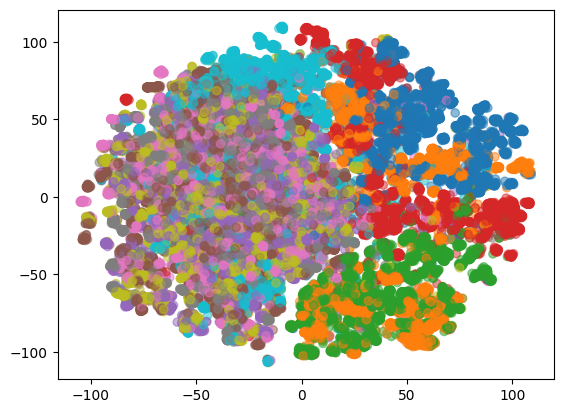

In [96]:
plt.scatter(x=X_embedded[:,0], y=X_embedded[:,1], c=val_labels, cmap='tab10', alpha=0.5)

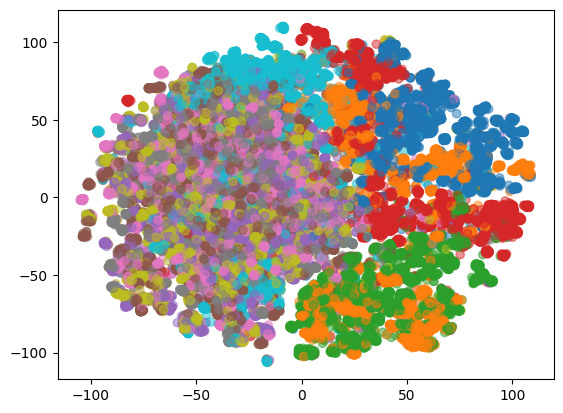

In [97]:
plt.scatter(x=X_embedded_img[:,0], y=X_embedded_img[:,1], c=val_labels, cmap='tab10', alpha=0.5)

## Analysis of meta labels which helped

### Find meta label df

In [13]:
N_splits = 5
kf = KFold(n_splits=N_splits, shuffle=True, random_state=42)
kf.get_n_splits(val_meta_data)


list_of_meta_labels_in_kfold = []

for i, (train_index, test_index) in enumerate(kf.split(val_meta_data)):
        # convert to numpy array
        X_train = np.array(val_meta_data[test_index])
        list_of_meta_labels_in_kfold.append(X_train)

In [15]:
list_of_meta_labels_in_kfold
meta_label_ready = np.vstack(list_of_meta_labels_in_kfold)
meta_label_ready.shape

df_metalabels = pd.DataFrame(meta_label_ready,columns=['multiple objects','background','color','brighter','darker','style','larger','smaller','object blocking','person blocking','partial view','pattern','pose','shape','subcategory','texture'])


### Make files of k-folds preds

In [17]:
# Read all csv files in folder '../../k-fold_1/'
path = '../../k-fold_1/' # '../bachelor_project/k-fold_1/'

list_logistic = []
for file in os.listdir(path):
    if file.endswith(".csv") and file[-9:-5] == 'FOLD':
        if file[0:5] == 'rfc_T':
            print(os.path.join(path, file))
            # read file
            list_logistic.append(pd.read_csv(os.path.join(path, file), index_col=0))


../../k-fold_1/rfc_TSNE-FOLD4.csv
../../k-fold_1/rfc_TSNE-FOLD1.csv
../../k-fold_1/rfc_TSNE-FOLD0.csv
../../k-fold_1/rfc_TSNE-FOLD2.csv
../../k-fold_1/rfc_TSNE-FOLD3.csv


In [241]:
df_KNN = pd.concat([list_logistic[2], list_logistic[1], list_logistic[3], list_logistic[4], list_logistic[0]], ignore_index=True)
# save to csv


In [242]:
#df_KNN.to_csv('../k-fold/dfrfc.csv')

In [381]:
df = pd.read_csv('../../k-fold/dflsvc.csv', index_col=0)

helping_index = (df['meta pred'] == df['true label']) & (df['meta pred'] != df['base pred'])

df_metalabels[helping_index].std() / df_metalabels.mean()

multiple objects     6.274540
background           0.548669
color                1.659243
brighter            18.031181
darker               9.917119
style                9.862997
larger              12.663772
smaller              4.327798
object blocking     13.799077
person blocking     16.177507
partial view         7.089425
pattern              1.404292
pose                 0.412630
shape                5.946875
subcategory          4.186834
texture              9.449548
dtype: float32

### Actually use data

In [360]:
list_labels = ['multiple objects','background','color','brighter','darker','style','larger','smaller','object blocking','person blocking','partial view','pattern','pose','shape','subcategory','texture']
def ratio_of_occurence(filename):
    df = pd.read_csv(filename, index_col=0)

    helping_index = (df['meta pred'] == df['true label']) & (df['meta pred'] != df['base pred'])
    harming_index = (df['base pred'] == df['true label']) & (df['meta pred'] != df['base pred'])
    #change_index = (df['meta pred'] != df['base pred']) & (df['meta pred'] != df['true label']) & (df['base pred'] != df['true label'])
    change_index = (df['meta pred'] != df['base pred']) 


    df_helping = df[helping_index]
    df_harming = df[harming_index]
    df_change = df[change_index]

    series_helper = df_metalabels[helping_index].mean() / df_metalabels.mean()
    series_harmer = df_metalabels[harming_index].mean() / df_metalabels.mean()
    series_change = df_metalabels[change_index].mean() / df_metalabels.mean()
    #series_change1 = df_metalabels[change_index1].mean() / df_metalabels.mean()


    df_ratios = pd.DataFrame([series_change, series_helper, series_harmer], index=['change', 'helper', 'disturber'])

    #print(filename)
    #print('helping',len(df_helping), df_metalabels[helping_index].sum(), '\n')      
    #print('disturbing', len(df_harming),df_metalabels[harming_index].sum(), '\n')
    #print('change', len(df_change), df_metalabels[change_index].sum())

    #print('')
    return df_ratios, [df_metalabels[change_index].sum(), df_metalabels[helping_index].sum(), df_metalabels[harming_index].sum()]


Change: 

(A: True, B: False) & (A: False, B: True) & (A: False, B: False, A!=B)


Example: 

- 1,1,1 -- 1
- 1,2,1 - 0
- 1,4,1 - 0
- 4,2,1 - 1
- 4,4,4 -- 1
- 3,2,2 - 1 
- 1,3,3 - 1
- 2,4,1 - 0
- 1,2,3 - 1
- 2,1,4 - 1


A: 2/10, B: 2/10, C: 4/10, c1: 8/10
A: 0/2 / 7/10, B: 2/2 / 7/10, C: 3/4 / 7/10, c1: 5/7 / 7/10
altså:
A: 0/2, B: 2/2, C: 3/4, c1: 5/7


In [361]:
def make_plot(df_ratios, classifier_name, significant):

    colors = ["silver", "mediumaquamarine","lightcoral", "#f4a261", "#e76f51"]

    fig, ax = plt.subplots(1,1, figsize=(16,4))
    # set y-axis limit
    g = (df_ratios.T - 1).plot(kind='bar',ax=ax, legend=False, figsize=(12,4), fontsize=10, color=colors[:4], rot=40, bottom=1)
    #ax.errorbar(data=df_std, x='Group', y='Mean', yerr='SD', ls='', lw=3, color='black')
    #sns.barplot(data=(df_ratios.T - 1),ax=ax, legend=False, figsize=(12,4), fontsize=10, color=colors[:3], rot=40, bottom=1, errorbar=('ci', 95))
        #xlim = g.get_xlim()
        #plt.errorbar(x, y, yerr=yerr, linewidth=0, elinewidth=1.8, alpha=1, c=".35")
    for i,c in enumerate(g.containers):
        for j,bar in enumerate(c):
            if significant[i][j] < 15:
                bar.set_alpha(0.3)

    leg = ax.legend(['change', 'helping', 'disturbing'], fontsize=10, loc='upper center' )#, labelcolor=colors[:3])
    for lh in leg.legendHandles: 
        lh.set_alpha(1)
    ax.hlines(y=1, xmin=-1, xmax=16, linewidth=2, color='dimgray')
    ax.set_ylim(0, 2)
    # set x-axis at value y = 1

    #ax.spines['left'].set_position('center')
    #ax.spines['bottom'].set_position('center')
    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    plt.rcParams.update({"font.size": 18})
    plt.xticks(rotation=40, ha="right", fontsize=10)
    plt.title(f'Ratio of occurence of meta labels ({classifier_name})', fontsize=20)
    plt.plot()


In [372]:
df_ratios, significant = ratio_of_occurence('../../k-fold/dfrfc.csv')

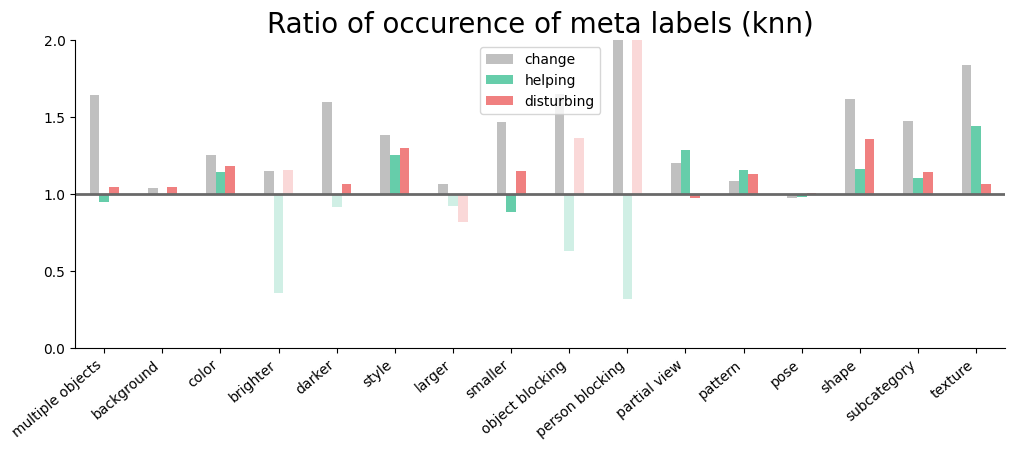

In [373]:
make_plot(df_ratios, 'knn', significant )

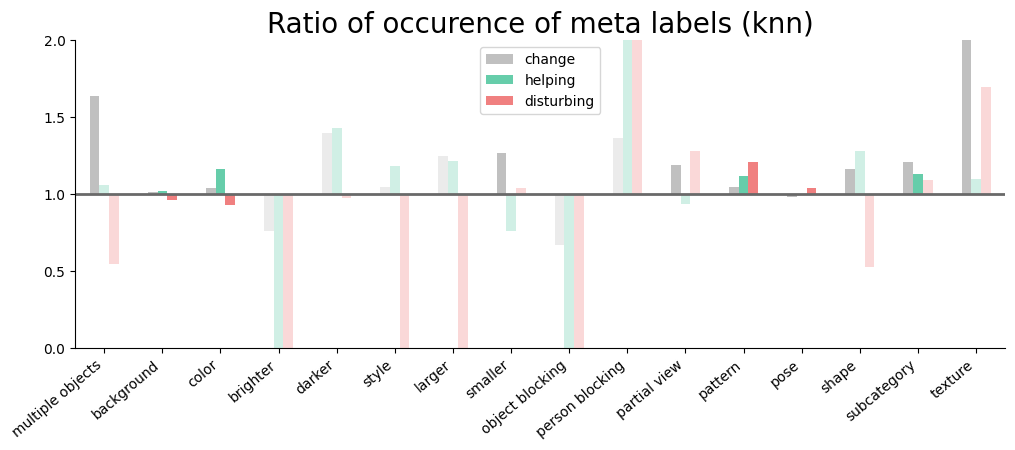

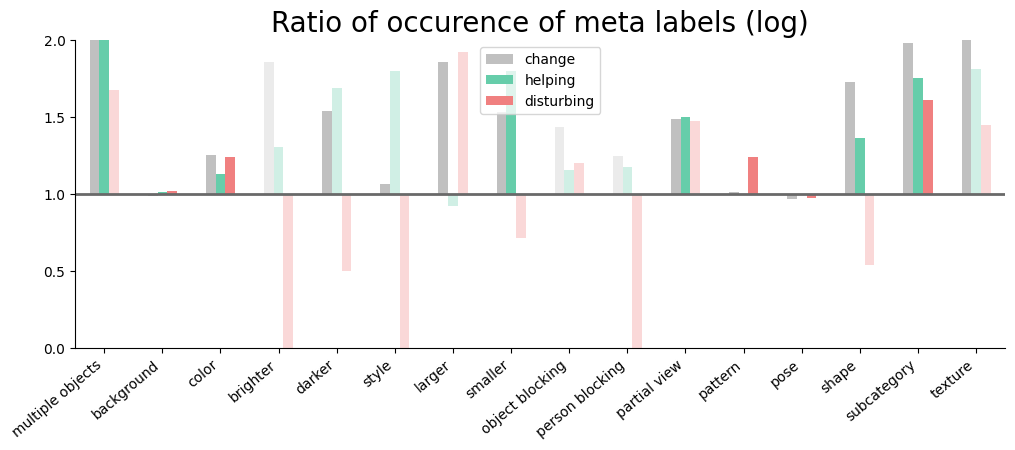

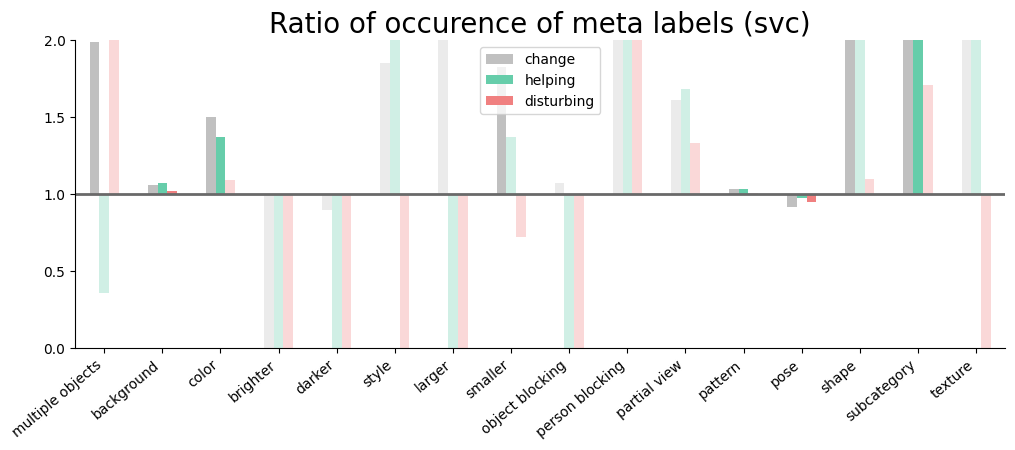

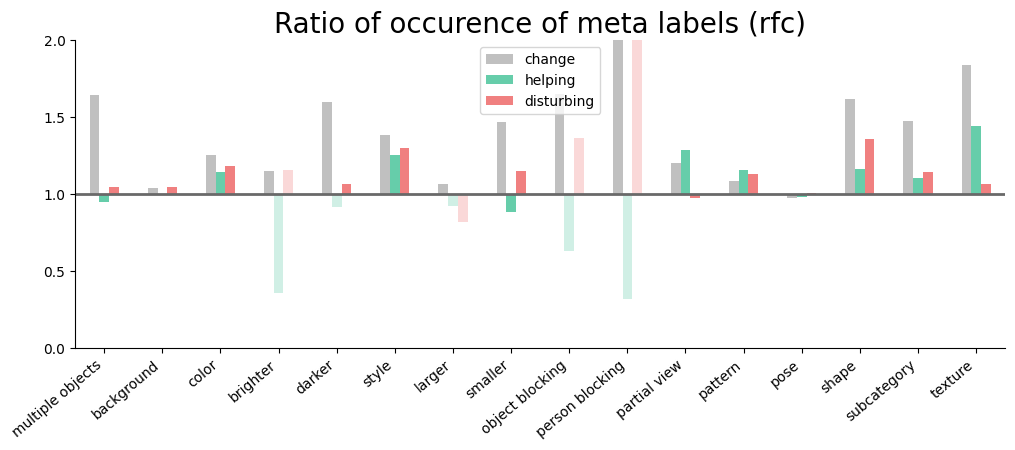

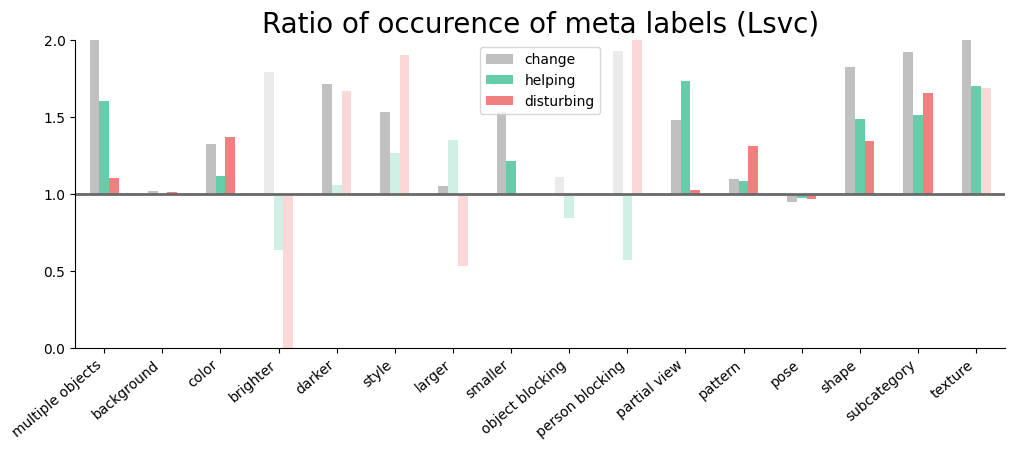

In [364]:
for name in ['knn', 'log', 'svc', 'rfc', 'Lsvc']:
    df_ratios,signi= ratio_of_occurence('../../k-fold/df{}.csv'.format(name))
    make_plot(df_ratios, name, signi)



#### Try error ratios

In [208]:
df_long = pd.melt(df_ratios, ignore_index=False)
df_long['type'] = df_long.index

In [219]:
df_long = df_long.reset_index(drop=True)
df_long.sort_values(by=['type'], inplace=True)
df_long['std'] = np.concatenate([yerr_c,yerr_d, yerr_h])

In [220]:
df_long

,variable,value,type,std
0,multiple objects,1.633975,change,0.242410
15,style,1.043722,change,0.416933
14,pose,0.979611,change,0.454383
13,brighter,0.758631,change,0.038605
12,texture,2.018532,change,0.121256
10,shape,1.165559,change,0.115120
9,object blocking,0.671232,change,0.101680
8,partial view,1.189412,change,0.265205
11,background,1.010350,change,0.054554
6,darker,1.397862,change,0.054554


In [374]:
df_change.std() / df_metalabels.mean()

multiple objects     6.328052
background           0.542529
color                1.625653
brighter            19.651337
darker              11.373363
style                8.958112
larger              12.178640
smaller              4.415692
object blocking     12.285540
person blocking     24.915531
partial view         5.928562
pattern              1.392934
pose                 0.407847
shape                5.299893
subcategory          3.794799
texture             10.268468
dtype: float32

In [193]:
yerr_h = (
            (df_helping)
            .std()
            .values
        )

yerr_d = (
            (df_disturbing)
            .std()
            .values
        )
yerr_c = (
            (df_change)
            .std()
            .values
        )
df_std = pd.DataFrame([yerr_c, yerr_h, yerr_d], index=['change', 'helper', 'disturber'])
df_std

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
change,0.242410,0.416933,0.454383,0.038605,0.121256,0.115120,0.101680,0.265205,0.054554,0.054554,0.193138,0.480549,0.354909,0.210074,0.289805,0.189534
helper,0.197886,0.414127,0.469521,0.000000,0.122772,0.122772,0.100501,0.209334,0.000000,0.071247,0.172279,0.488021,0.344782,0.220069,0.281514,0.141399
disturber,0.143576,0.441166,0.441166,0.000000,0.102062,0.000000,0.000000,0.243332,0.000000,0.102062,0.200875,0.495595,0.293011,0.143576,0.277836,0.174906


In [223]:
df_change.std()

multiple objects    0.242410
background          0.416933
color               0.454383
brighter            0.038605
darker              0.121256
style               0.115120
larger              0.101680
smaller             0.265205
object blocking     0.054554
person blocking     0.054554
partial view        0.193138
pattern             0.480549
pose                0.354909
shape               0.210074
subcategory         0.289805
texture             0.189534
dtype: float32

In [239]:
df_metalabels.mean()
#df_change  / df_metalabels.mean()
df_change.mean()

multiple objects    0.062593
background          0.776453
color               0.290611
brighter            0.001490
darker              0.014903
style               0.013413
larger              0.010432
smaller             0.076006
object blocking     0.002981
person blocking     0.002981
partial view        0.038748
pattern             0.360656
pose                0.852459
shape               0.046200
subcategory         0.092399
texture             0.037258
dtype: float32

In [230]:
(df_change/df_metalabels.mean()).std()

multiple objects     6.328052
background           0.542529
color                1.625653
brighter            19.651335
darker              11.373363
style                8.958112
larger              12.178639
smaller              4.415692
object blocking     12.285540
person blocking     24.915533
partial view         5.928562
pattern              1.392934
pose                 0.407847
shape                5.299893
subcategory          3.794799
texture             10.268468
dtype: float32

ValueError: too many values to unpack (expected 1)

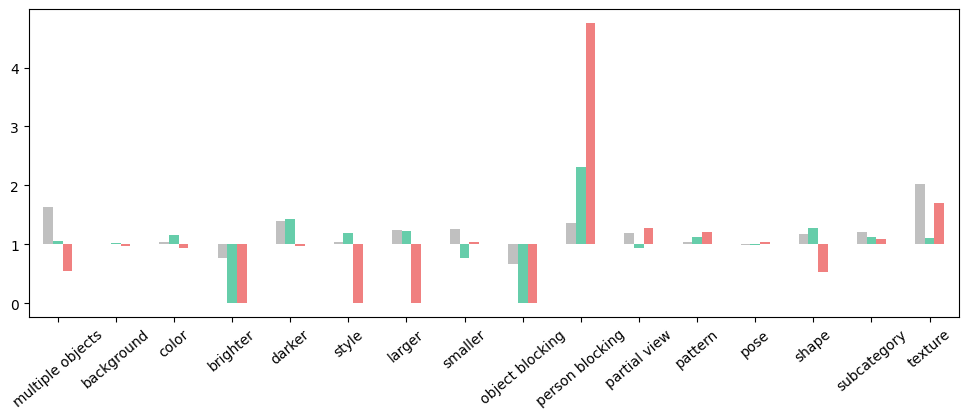

In [196]:
#df_ratios = ratio_of_occurence('../../k-fold/dfknn.csv')
make_plot(df_ratios, 'knn')

../../k-fold/dfknn.csv
helping 197 disturbing 96 change 671

../../k-fold/dflog.csv
helping 389 disturbing 187 change 1096

../../k-fold/dfsvc.csv
helping 73 disturbing 23 change 210

../../k-fold/dfrfc.csv
helping 1431 disturbing 1320 change 7093

../../k-fold/dfLsvc.csv
helping 797 disturbing 450 change 2845

../../k-fold/dfknn.csv
helping 197 disturbing 96 change 671



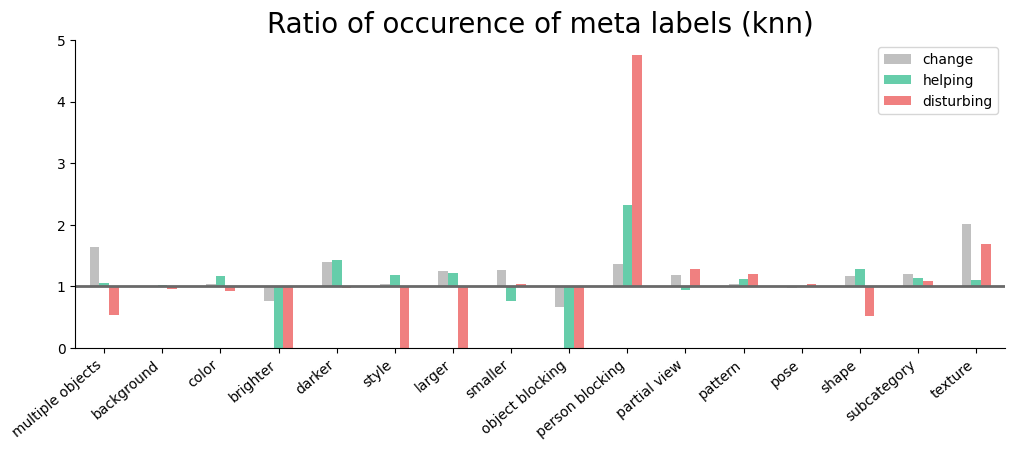

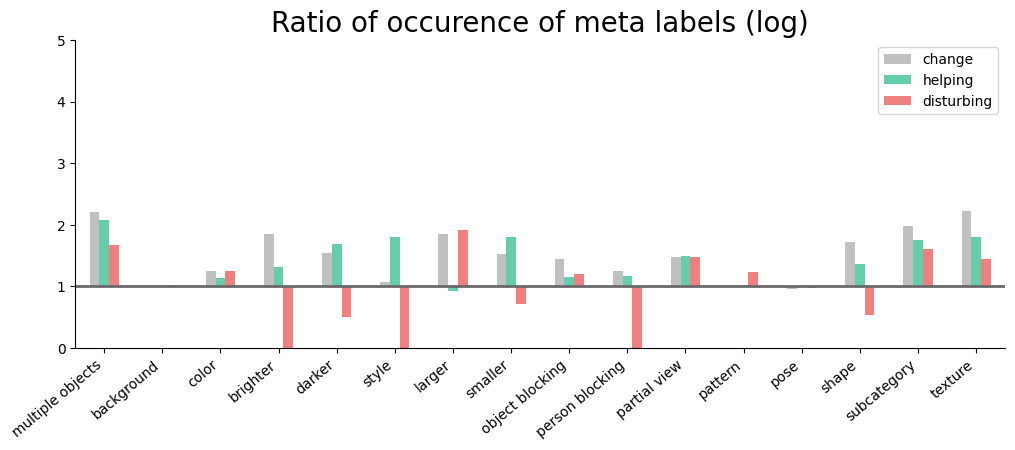

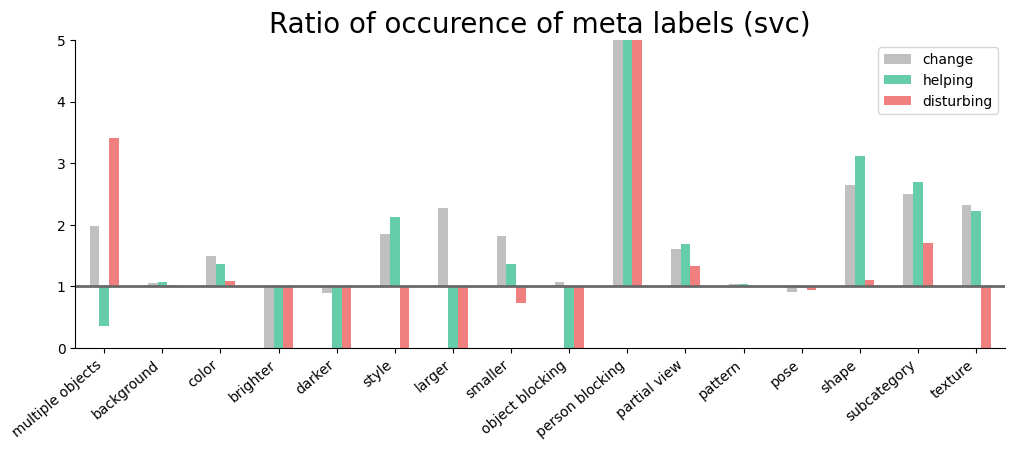

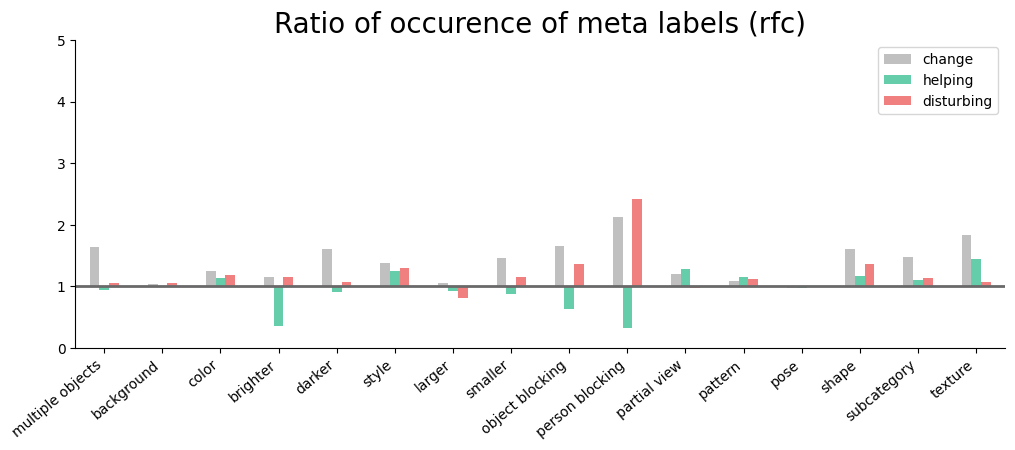

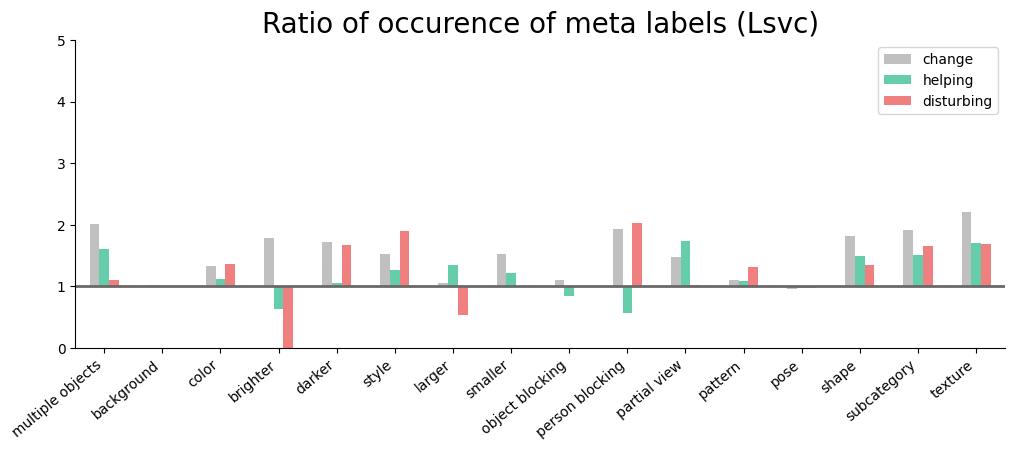

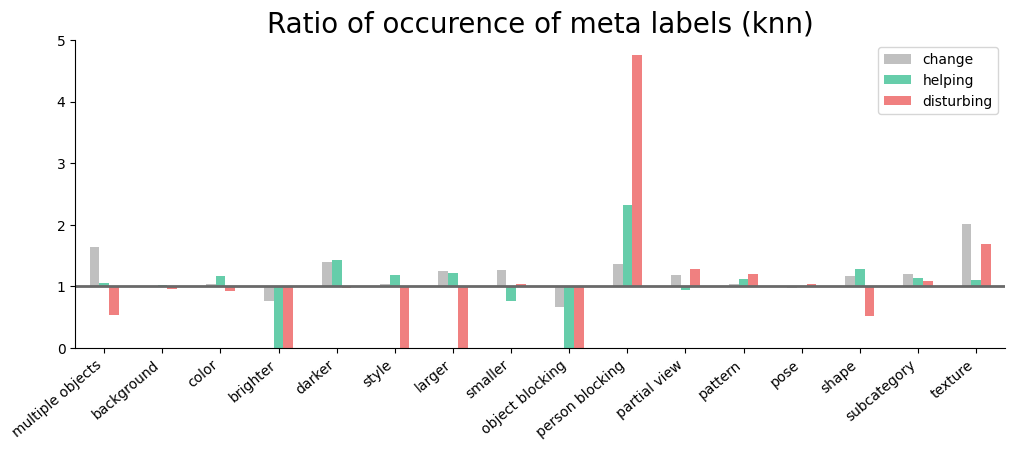

In [127]:
for name in ['knn', 'log', 'svc', 'rfc', 'Lsvc']:
    df_ratios = ratio_of_occurence('../../k-fold/df{}.csv'.format(name))
    make_plot(df_ratios, name)

df_ratios = ratio_of_occurence('../../k-fold/dfknn.csv')
make_plot(df_ratios, 'knn')

In [102]:
df_ratios.iloc[0] + df_ratios.iloc[1] + FF / (df_ratios.iloc[2]*3)


multiple objects    4.048562
background          2.380494
color               2.560968
brighter                 inf
darker              3.334172
style                    inf
larger                   inf
smaller             2.534106
object blocking          inf
person blocking     3.679609
partial view        2.462939
pattern             2.430327
pose                2.277785
shape               3.250436
subcategory         2.731408
texture             3.626516
dtype: float32

In [81]:
df_ratios

,multiple objects,background,color,brighter,darker,style,larger,smaller,object blocking,person blocking,partial view,pattern,pose,shape,subcategory,texture
change,1.633975,1.010350,1.039723,0.758631,1.397862,1.043722,1.249511,1.265506,0.671232,1.361282,1.189412,1.045407,0.979611,1.165559,1.209907,2.018532
helper,1.060089,1.017212,1.162303,0.000000,1.428374,1.185004,1.215985,0.760664,0.000000,2.318326,0.934903,1.118253,0.991660,1.280645,1.129967,1.100048
disturber,0.543848,0.962374,0.931696,0.000000,0.977047,0.000000,0.000000,1.040630,0.000000,4.757399,1.278999,1.207762,1.041426,0.525598,1.091193,1.693043


In [41]:
np.array([1,1]).T @ np.array([[1,1],[0,0]])

array([1, 1])

In [42]:
np.array([[1,1],[0,0]])

array([[1, 1],
       [0, 0]])